In [1]:
#from here https://www.kaggle.com/c/intel-mobileodt-cervical-cancer-screening/discussion/31565
from cervical_utils import *
%matplotlib inline

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
cd /mnt/kaggle_crevical/

/mnt/kaggle_crevical


In [3]:
df1=pd.read_table('Type_1_bbox.tsv',sep=' ',header=None)
df2=pd.read_table('Type_2_bbox.tsv',sep=' ',header=None)
df3=pd.read_table('Type_3_bbox.tsv',sep=' ',header=None)

In [4]:
df1=df1.drop(df1.columns[[6,7,8,9]], axis=1) 
df1.columns=['name','num','x','y', 'width' , 'height']
df2.columns=['name','num','x','y', 'width' , 'height']
df3.columns=['name','num','x','y', 'width' , 'height']

### save things to disk

In [5]:
imgs=[]
for i in range(len(df1)):
    imgs.append(image.img_to_array(image.load_img('train/'+df1.iloc[i,0].replace("\\",'/')))\
                [df1.y[i]:df1.y[i]+df1.height[i],df1.x[i]:df1.x[i]+df1.width[i]])

In [6]:
imgs=np.array(imgs)
save_array('shrunk_files/cropped_1',imgs)

In [5]:
imgs=[]
for i in range(len(df2)):
    try:
        imgs.append(image.img_to_array(image.load_img('train/'+df2.iloc[i,0].replace("\\",'/')))\
                    [df2.y[i]:df2.y[i]+df2.height[i],df2.x[i]:df2.x[i]+df2.width[i]])
    except:
        print('error at ',i)

In [6]:
imgs=np.array(imgs)
save_array('shrunk_files/cropped_2',imgs)

In [7]:
imgs=[]
for i in range(len(df3)):
    imgs.append(image.img_to_array(image.load_img('train/'+df3.iloc[i,0].replace("\\",'/')))\
                [df3.y[i]:df3.y[i]+df3.height[i],df3.x[i]:df3.x[i]+df3.width[i]])

In [8]:
imgs=np.array(imgs)
save_array('shrunk_files/cropped_3',imgs)

### finished saving

In [15]:
imgs_1=np.array(load_array('shrunk_files/cropped_1'))
imgs_2=np.array(load_array('shrunk_files/cropped_2'))
imgs_3=np.array(load_array('shrunk_files/cropped_3'))

In [16]:
imgs=np.concatenate([imgs_1,imgs_2,imgs_3])

In [37]:
imgs_resized=[]
errors=[]
for i,img in enumerate(imgs):
    try:
        imgs_resized.append(imresize(img,[224,224]))
    except:
        print('error in',i)
        errors.append(i)
imgs_resized=np.array(imgs_resized)

error in 278
error in 381
error in 445
error in 630
error in 631
error in 744
error in 1051
error in 1085
error in 1216


In [39]:
errors=[278,381,445,630,631,744,1051,1085,1216]

In [43]:
y=np.concatenate([[1]*len(imgs_1),[2]*len(imgs_1),[3]*len(imgs_1)])

In [47]:
y=len(np.delete(y, errors))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """Entry point for launching an IPython kernel.


## start preparing model

In [29]:
##no.... first lets try to predict them
# i think i'll first try jeremys vgg ,
#xgboost regressor on bottnect
#and then ssd
from scipy.misc import imresize

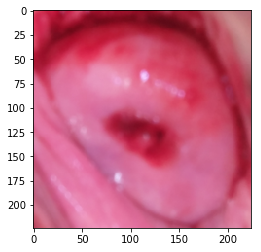

In [30]:
plt.imshow(imresize(imgs_1[0],[224,224]))

In [50]:
def split_at(model, layer_type):
    layers = model.layers
    layer_idx = [index for index,layer in enumerate(layers)
                 if type(layer) is layer_type][-1]
    return layers[:layer_idx+1], layers[layer_idx+1:]

In [58]:
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D
from keras.models import Sequential
vgg=VGG16()

In [52]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [56]:
conv_layers,fc_layers = split_at(vgg, Conv2D)

In [59]:
conv_model = Sequential(conv_layers)

In [61]:
conv_feat = conv_model.predict(imgs_resized)

KeyboardInterrupt: 